## 머신러닝 분류 평가지표
- precision-recall curve
- ROC Cu와 AUC

- 데이터 불러오기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
digits.target.shape

(1797,)

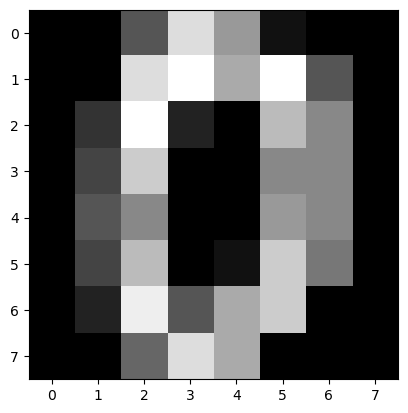

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')

- 9이면 1, 0~8 이면 0으로 분류하는 문제 (multi-class -> binary classification)

In [4]:
y = (digits.target == 9).astype(int)
set(y)

{0, 1}

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0, test_size=0.25)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

- 모델1: Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train) # 학습 

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       403
           1       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - 모델2 Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train) # 학습 

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       403
           1       1.00      0.74      0.85        47

    accuracy                           0.97       450
   macro avg       0.99      0.87      0.92       450
weighted avg       0.97      0.97      0.97       450



- Precision Recall Curve

In [11]:
print(classification_report(y_test, (logreg.predict_proba(X_test)[:,1] > 0)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.10      1.00      0.19        47

    accuracy                           0.10       450
   macro avg       0.05      0.50      0.09       450
weighted avg       0.01      0.10      0.02       450



c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Precision: 47 / 450, Recall: 47 / 47
print(classification_report(y_test, (logreg.predict_proba(X_test)[:,1] >= 0.5)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       403
           1       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



In [13]:
# Logistic Regreesion 
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [15]:
len(thresholds)

450

Text(0, 0.5, 'recall')

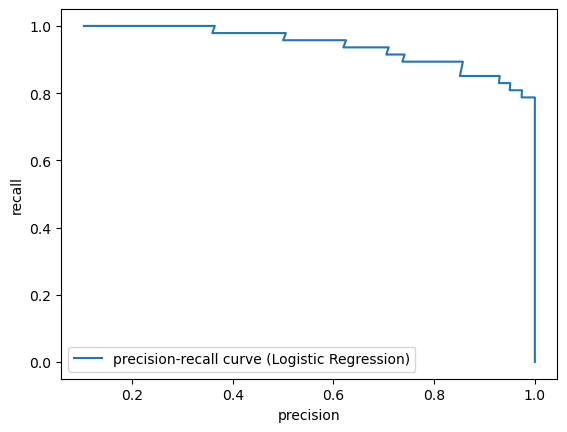

In [16]:
plt.plot(precision, recall, label='precision-recall curve (Logistic Regression)')
plt.legend()
plt.xlabel('precision')
plt.ylabel('recall')

Text(0, 0.5, 'recall')

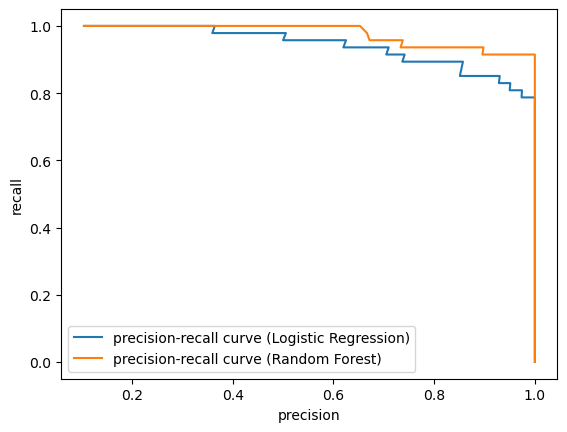

In [18]:
plt.plot(precision, recall, label='precision-recall curve (Logistic Regression)')
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision_rf, recall_rf, label='precision-recall curve (Random Forest)')

plt.legend()
plt.xlabel('precision')
plt.ylabel('recall')

In [19]:
# Random Forest Threshold 조정
print(classification_report(y_test, rf.predict_proba(X_test)[:,1] > 0.4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       403
           1       1.00      0.81      0.89        47

    accuracy                           0.98       450
   macro avg       0.99      0.90      0.94       450
weighted avg       0.98      0.98      0.98       450



- ROC와 AUC<br>
AUC  : ROC  커브 아래의 면적 Area Under the Curve 


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'TPR (True Positive Rate)')

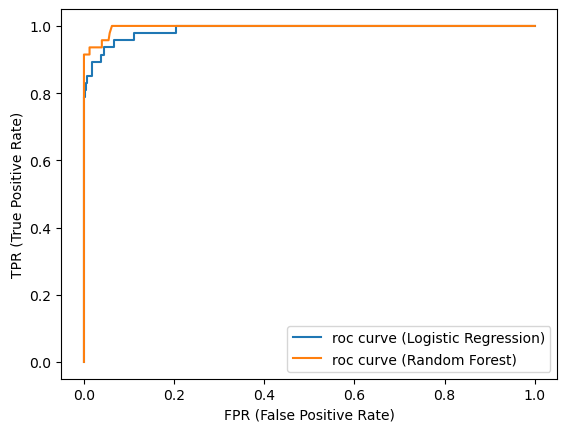

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='roc curve (Logistic Regression)')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='roc curve (Random Forest)')

plt.legend()
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')

In [22]:
# Logistic Regression에 대한 AUC
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.9890713267514915

In [23]:
# Random Forest에 대한 AUC
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9964363022015732

In [ ]:
# AUC는 1에 가까울수록 좋다